# Convolutional Neural Network (CNN) using Keras
This notebook will guide you through the process of creating a CNN model using Keras. Follow the steps and fill in the code blocks as you progress.

# Dataset Card: Men vs. Women Classification

## Overview
The Men vs. Women Classification dataset contains images of men and women intended for binary image classification tasks. The goal is to classify images based on gender.

- **Dataset URL:** [Men vs. Women Classification Dataset](https://www.kaggle.com/datasets/saadpd/menwomen-classification)
- **Dataset Size:** ~845 MB
- **Classes:** 2 (Men, Women)
- **Image Format:** JPEG

## Structure

### Folders
The dataset is organized into two main folders:

- `traindata/`:
  - `traindata/`: Contains the training images.
    - `men/`: Contains images of men.
    - `women/`: Contains images of women.

- `testdata/`:
  - `testdata/`: Contains the testing images.
    - `men/`: Contains images of men.
    - `women/`: Contains images of women.

### Example Files
Here are some example file names you might find in the dataset:

- `traindata/traindata/men/000000899.jpg`
- `traindata/traindata/women/00000001.jpg`
- `testdata/testdata/men/00000504.jpg`
- `testdata/testdata/women/00000002.jpg`

### Image Specifications
- **Resolution:** Varies
- **Color:** RGB

## Usage
This dataset is ideal for practicing binary image classification using Convolutional Neural Networks (CNNs). It can be used to train a model to distinguish between images of men and women.

## Step 1: Import Required Libraries
Begin by importing the necessary libraries.

In [3]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Load and Preprocess Data
Load your dataset and preprocess it. This may include resizing images, normalizing pixel values, and splitting the data into training and validation sets.

In [7]:
# Load and preprocess the data
# Hint: Use ImageDataGenerator for image preprocessing
# Example:
# datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# train_generator = datagen.flow_from_directory('path_to_data', target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='training')
# validation_generator = datagen.flow_from_directory('path_to_data', target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='validation')

data = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = data.flow_from_directory('traindata', target_size=(150, 150), batch_size=32, class_mode='binary', subset='training')
test_generator = data.flow_from_directory('testdata', target_size=(150, 150), batch_size=32, class_mode='binary', subset='validation')

Found 2313 images belonging to 2 classes.
Found 265 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'men': 0, 'women': 1}

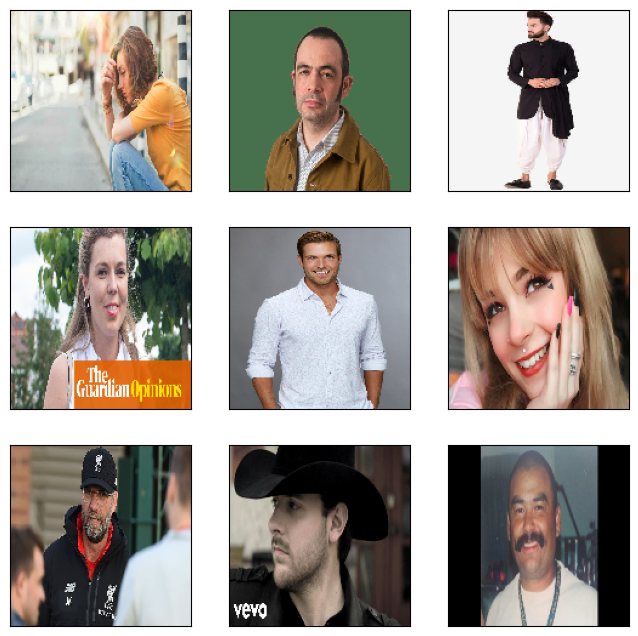

In [24]:

# Get a batch of images and labels from the train generator
images, labels = next(train_generator) 
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(images[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

## Step 3: Data Augmentation
To prevent overfitting, augment your data using various transformations like rotation, zoom, flip, etc.

In [10]:
# Data Augmentation
# Example:
# datagen_train = ImageDataGenerator(
#    rescale=1./255,
#    rotation_range=40,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    shear_range=0.2,
#    zoom_range=0.2,
#    horizontal_flip=True,
#    fill_mode='nearest')

datagen_train = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

## Step 4: Build the CNN Model
Define the architecture of your CNN model. Start with convolutional layers followed by pooling layers, and end with fully connected layers.

In [11]:
# Build the model
# Example:
# model = Sequential([
#    Conv2D(32, (3, 3), activation='relu', input_shape=(100, img_width, 3)),
#    MaxPooling2D(2, 2),
#    Conv2D(64, (3, 3), activation='relu'),
#    MaxPooling2D(2, 2),
#    Flatten(),
#    Dense(128, activation='relu'),
#    Dropout(0.5),
#    Dense(num_classes, activation='softmax')
# ])
# model.summary()


In [13]:
model= Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 82944)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

## Step 5: Compile the Model
Compile your model by specifying the optimizer, loss function, and evaluation metrics.

In [14]:
# Compile the model
# Example:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
images, labels = next(train_generator)
print(images.shape)
print(labels.shape)

(32, 150, 150, 3)
(32,)


## Step 6: Train the Model
Train your model using the training data and validate it using the validation data.

In [16]:
# Train the model
# Example:
# history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)
history = model.fit(train_generator, epochs=5, validation_data=test_generator)

Epoch 1/5
73/73 [==============================] - 71s 951ms/step - loss: 0.7707 - accuracy: 0.6312 - val_loss: 0.6123 - val_accuracy: 0.6830
Epoch 2/5
73/73 [==============================] - 64s 864ms/step - loss: 0.6024 - accuracy: 0.6831 - val_loss: 0.6288 - val_accuracy: 0.6792
Epoch 3/5
73/73 [==============================] - 66s 909ms/step - loss: 0.5478 - accuracy: 0.7181 - val_loss: 0.5839 - val_accuracy: 0.7358
Epoch 4/5
73/73 [==============================] - 63s 870ms/step - loss: 0.4531 - accuracy: 0.7895 - val_loss: 0.5395 - val_accuracy: 0.7170
Epoch 5/5
73/73 [==============================] - 67s 922ms/step - loss: 0.3666 - accuracy: 0.8340 - val_loss: 0.5606 - val_accuracy: 0.7208


## Step 7: Evaluate the Model
Evaluate the performance of your model using the validation set.

In [17]:
# Evaluate the model
# Example:
loss, accuracy = model.evaluate(test_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

9/9 [==============================] - 6s 672ms/step - loss: 0.5606 - accuracy: 0.7208
Validation Loss: 0.5606371760368347
Validation Accuracy: 0.7207547426223755


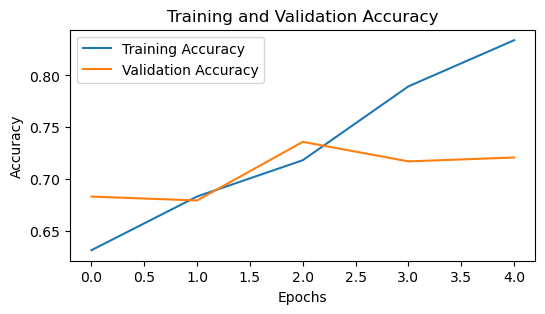

In [18]:
plt.figure(figsize=(6, 3))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

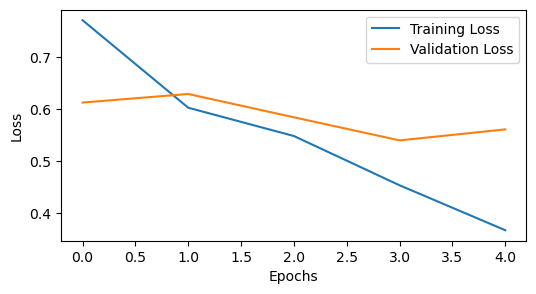

In [19]:
plt.figure(figsize=(6, 3))

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

## Step 8: Save the Model
Finally, save your trained model for future use.

In [21]:
# Save the model
# Example:
model.save('my_model.keras')